# Generate synthetic temporal datasets for model testing

To help you understand the model, it is useful to force the model with datasets that are simple to interpret.

Here you fill find a set of functions that can help you to create systhetic timeseries that can be used for model testing. DRYP uses *.csv and *.nc as temporal dataset for model forcings.

Below you can find a set of examples of synthetic datasets:
* Create timeseries of precipitation and potential evapotranspiration
* Create timeseries of water abstractions
* Create gridded datasets at different temporal resolutions and for different variables



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr
import calendar

In [2]:
def create_timeseries(pre=0.1, pet=0.1, years=5, ndayswet=10, ndaysdry=21):
	#precipitation = 0.20 #[mm/h]
	# Evapotrsnspiraiton rate
	# duration of the cycle
	# number of rainy days
	#nrain = 10 #days
	# number of dry days
	#ndry = 20 #days
	
	# Create pulse event
	data = np.ones(24*ndayswet)
	data = np.append(data, np.zeros(ndaysdry*24))#reshape(-1).reshape(-1)
	#print(data)# = np.append()
	
	# Create pulse event series
	data_1 = []
	for i in range(years*12):
		data_1 = np.append(data_1, data).reshape(-1)

	#data_1 = data_1.reshape(-1)
	# Creeate dataframe
	df = pd.DataFrame()
	
	# Date
	df['Date'] = pd.date_range(datetime.date(2000, 1, 1),
			periods=len(data_1), freq='H')	
	
	# Precipitation
	df['pre'] = data_1*pre
	
	# Evapotranspiration
	df['pet'] = pet*(np.sin(
		(np.arange(len(data_1))+18)*np.pi/12)+1.0)*0.5#+PET
	
	return df

def create_simple_timeseries(default_values=[-0.001, -0.001], var_name="fluxSZ", years=5):
	# length of data depend on number of years
	# Creeate dataframe
	df = pd.DataFrame()
	
	# Date
	df['Date'] = pd.date_range(datetime.date(2000, 1, 1),
			periods=24*365*years, freq='H')	
	
	# Precipitation
	for i, ivalue in enumerate(default_values):
		df[var_name+str(i)] = ivalue
	
	return df

In [3]:
def create_netcdf_from_dataframe(dataframe, ifield, lat, lon, time_var="Date"):
	"""Function to create netCDF files from csv viels"""
	
	# Create a DataArray with time, lat, and long dimensions
	da = xr.DataArray(
		dataframe[ifield].values[:, np.newaxis, np.newaxis]*
		np.ones((len(lat), len(lon))),
		dims=('time', 'lat', 'lon'),
		coords={'time': dataframe[time_var],
		'lat': lat,
		'lon': lon}
		)
	da = xr.Dataset({ifield: da})		
	return da

## Generate csv files

In [17]:
ds = create_timeseries(pre=0.5, pet=0.2, years=5, ndayswet=10, ndaysdry=20)

In [18]:
folder = "C:/Users/Edisson\OneDrive - Cardiff University/models/cuwalid/examples_json/"

In [19]:
fname = folder + "/mlakes/input/mLA_time_series.csv"

In [20]:
# Save dataframe
ds.to_csv(fname,index = False)

In [15]:
#ds.sum()

<Axes: xlabel='Date'>

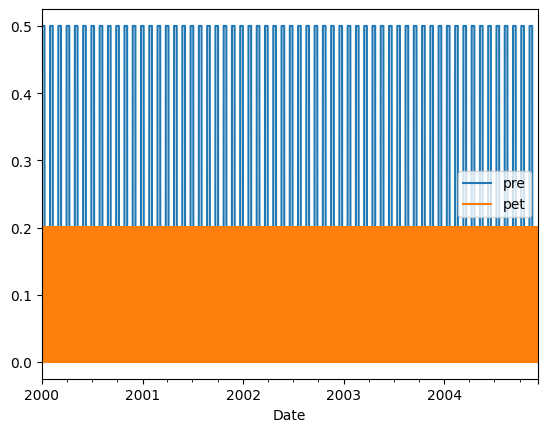

In [16]:
ds.plot(x="Date")

### generate abstractions

In [30]:
ds = create_simple_timeseries()

In [31]:
fname = folder + "/abstraction/input/ABS_60min.csv"

In [32]:
# Save dataframe
ds.to_csv(fname,index = False)

## Generate gridded datasets

In [4]:
folder = "C:/Users/Edisson\OneDrive - Cardiff University/models/cuwalid/examples_json/"

In [5]:
ncol = 21
nrow = 21
cell = 1000.

In [6]:
lat = np.linspace(0, nrow*cell, nrow)
lon = np.linspace(0, ncol*cell, ncol)

Create crop coeficient

In [7]:
kc = np.array([0.1, 0.1, 0.25, 0.50, 0.75, 1.0, 1.0, 1.0, 0.75, 0.50, 0.25, 0.10])
time = np.arange(1, 13)

In [8]:
df = pd.DataFrame({"Date": time, "kc": kc})

In [9]:
ds = create_netcdf_from_dataframe(df, "kc", lat, lon)

In [358]:
fname = folder + "/DynaVeg/input/DV_time_series_kc.nc"

In [259]:
# Save dataframe
ds.to_netcdf(fname)
#ds

<xarray.Dataset>
Dimensions:  (time: 12, lat: 21, lon: 21)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 0.0 1.05e+03 2.1e+03 ... 1.89e+04 1.995e+04 2.1e+04
  * lon      (lon) float64 0.0 1.05e+03 2.1e+03 ... 1.89e+04 1.995e+04 2.1e+04
Data variables:
    kc       (time, lat, lon) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1

Create LAI

In [13]:
LAI = np.array([0.1, 0.1, 0.25, 0.50, 0.75, 1.0, 1.0, 0.75, 0.50, 0.25, 0.10, 0.1])

In [14]:
df = pd.DataFrame({"Date": time, "LAI": LAI})

In [15]:
ds = create_netcdf_from_dataframe(df, "LAI", lat, lon)

In [391]:
fname = folder + "/DynaVeg/input/DV_time_series_LAI.nc"

In [264]:
# Save dataframe
ds.to_netcdf(fname)

Create vegetation fraction cover

In [334]:
av = np.array([0.1, 0.1, 0.25, 0.50, 0.50, 0.5, 0.5, 0.5, 0.50, 0.25, 0.10, 0.10])

In [335]:
df = pd.DataFrame({"Date": time, "VegetationFraction": av})

In [336]:
ds = create_netcdf_from_dataframe(df, "VegetationFraction", lat, lon)

In [275]:
fname = folder + "/DynaVeg/input/DV_time_series_av.nc"

In [276]:
# Save dataframe
ds.to_netcdf(fname)

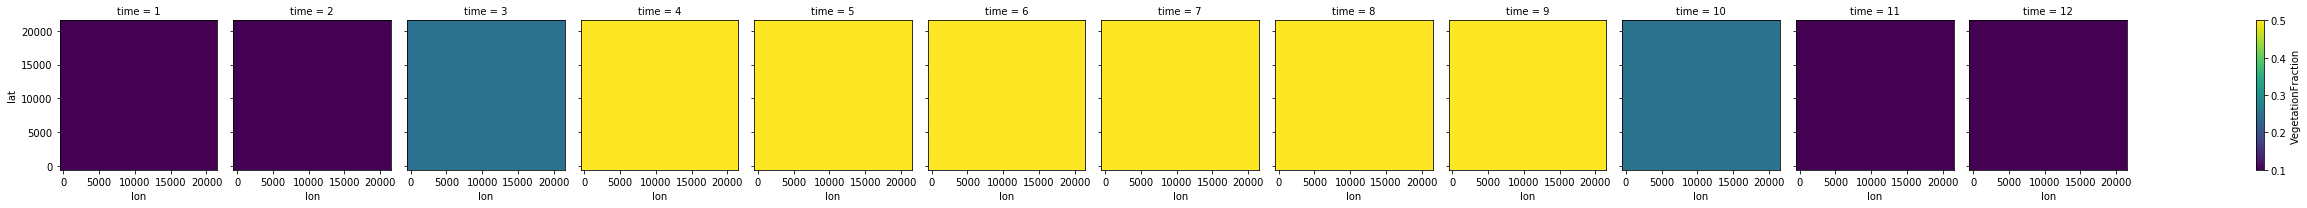

In [277]:
ds["VegetationFraction"].plot(x='lon', y='lat', col='time')

### Generate daily kc values in monthly files

In [11]:
def create_dailydataset_from_yearly(dataset, year=2020):
		
	# Assuming time is the coordinate for monthly data
	time_monthly = dataset['time'].values

	# Generate a list of the number of days in each month for a non-leap year
	days_per_month = [calendar.monthrange(year, month)[1] for month in time_monthly]

	# Generate a daily time coordinate
	time_daily = np.arange(1, sum(days_per_month))
	
	# update time
	dataset["time"] = np.cumsum(days_per_month)
		
	# Interpolate to daily values
	ds_daily = dataset.reindex(time=time_daily, method='nearest').interpolate_na(dim='time')
	
	# Save the interpolated data to a new NetCDF file
	#ds_daily.to_netcdf("daily_data.nc")
	return ds_daily
    
def create_daily_monthly_dataset_yearlyfiles(dataset, year=2020, fname=None):
		
	# Assuming time is the coordinate for monthly data
	time_monthly = dataset['time'].values

	# Generate a list of the number of days in each month for a non-leap year
	days_per_month = [calendar.monthrange(year, month)[1] for month in time_monthly]

	# Generate a daily time coordinate
	time_daily = np.arange(1, days_per_month[0]+1)
	
	# update time
	dataset["time"] = [1, days_per_month[0]+1]
		
	# Interpolate to daily values
	ds_month_daily = dataset.reindex(time=time_daily, method='nearest').interpolate_na(dim='time')
	
	# Save the interpolated data to a new NetCDF file
	if fname is not None:
		ds_month_daily.to_netcdf(fname)
	return ds_month_daily

In [393]:
#create_daily_monthly_dataset_yearlyfiles(ds)

In [339]:
ds['time'].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [341]:
#create_daily_monthly_dataset_yearlyfiles(ds["VegetationFraction"][0:2])
#dfs = ds["VegetationFraction"][1:3]

In [323]:
#dfs

In [16]:
for i, imonth in enumerate(range(12)):
    if i == 0:
        imonth = 12
    #fname = folder + "/DynaVeg/input/DV_time_series_kc_"+"{:02}".format(imonth)+".nc"
    fname = folder + "DynaVeg/input/DV_time_series_LAI_"+"{:02}".format(imonth)+".nc"
    #fname = folder + "/DynaVeg/input/DV_time_series_av_"+"{:02}".format(i+1)+".nc"
    
    #print(i-1,i, fname)
    #create_daily_monthly_dataset_yearlyfiles(ds["kc"][[i-1,i]], fname=fname)
    create_daily_monthly_dataset_yearlyfiles(ds["LAI"][[i-1,i]], fname=fname)
    #create_daily_monthly_dataset_yearlyfiles(ds["VegetationFraction"][[i-1,i]], fname=fname)

In [386]:
fname = folder + "/DynaVeg/input/DV_time_series_LAI_02.nc"

In [399]:
#xr.open_dataset(fname)